<a href="https://colab.research.google.com/github/magrolix4k/bert_simpletransfromer/blob/main/bert_simpletransfromer_textClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## สร้าง Sentiment Classcification Model จาก Transformer Model แบบ BERT


## 1) ติดตั้ง Simpletransformers
Simpletransformers เป็นไลบรารีที่ให้การสนับสนุนในการทำ Natural Language Processing (NLP) ใน Python โดยใช้โมเดลที่ถูกทำการเทรนมาล่วงหน้าแล้ว เช่น BERT, GPT, RoBERTa, XLM, และอื่น ๆ โดยมีวัตถุประสงค์เพื่อทำให้ง่ายต่อการใช้งานและทดสอบโมเดลที่เทรนไว้แล้ว

In [1]:
!pip install simpletransformers -qq

## 2) import ไลเบอรี่ที่จำเป็น ดังนี้
- ClassificationModel มีหน้าที่สร้างโมเดลแบบ Sentiment Classcification และตั้งค่า paramiter ต่างๆภายในโมเดล
- pandas เป็นไลบรารีที่มีความสามารถในการจัดการและวิเคราะห์ข้อมูลใน Python อย่างมีประสิทธิภาพมาก ๆ ซึ่งใช้โครงสร้างข้อมูลที่เรียกว่า DataFrame เป็นหลัก ซึ่งเป็นตารางข้อมูลที่มีแถวและคอลัมน์ เพื่อทำให้ง่ายต่อการดำเนินการกับข้อมูลต่าง ๆ ในที่นี้ ใช้ในการดึง Dataset เข้าสู่โปรแกรม
- logging ทำหน้าที่เก็บ log ขอองข้อมูลที่ต้องการ


In [2]:
from simpletransformers.classification import ClassificationModel
import pandas as pd
import logging


logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

## 3) เชื่อมต่อกับ Google Drive เพื่อดึงข้อมูลจากที่ดังกล่าวมาใช้ได้

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 4) นำ Dataset จาก Google Drive เข้าสู่โปรแกรม และเปลี่ยนชื่อ column จาก Text เป็น text และจาก RateType เป็น *label*

In [4]:
# Preparing train data
df_all = pd.read_csv('/content/drive/MyDrive/dataset/TweetDatatrains.csv', index_col=0)
df_all["Label"] = df_all["Label"].astype('category')
df_all["Label"] = df_all["Label"].cat.codes
df_all = df_all.rename(columns={"Text_ID":"text"})
df_all = df_all.rename(columns={"Label":"labels"})
df_all

,text,labels
ID,,
1.686766e+18,⌢⌢⌢⌢⌢⌢⌢⌢⌢ ⌢⌢⌢⌢⌢⌢⌢⌢𓏔 wts การ์ดจองกุก / ยุนกิ แ...,0
1.686766e+18,การ์ดแทฮยอง butter cream ver. ไม่มีตำหนิเลยคับ...,0
1.686766e+18,พร้อมส่ง ✨การ์ดแทฮยองได้ทั้ง 3ใบ 400.- รวมส่ง ...,0
1.686765e+18,พร้อมส่ง ✨การ์ดแทฮยองใบละ 150.- ไม่มีตำหนิค่าจ...,0
1.686765e+18,ღ​ พร้อมส่งการ์ดแท้💵 ใบละ​ 100📍 ส่งฟรีทุกใบ#ตล...,0
...,...,...
1.758024e+18,เฟรมการ์ด80฿ ห้อยชื่อฟรี⟢สั่งซื้อ DM แอค @hoor...,0
1.758018e+18,❗[PRE] แท่งไฟ❗LESSERAFIM TWICE Newjeans Sevent...,2
1.757989e+18,ปล่อยการ์ด - ส่งต่อ✨ซานะ✨รวมส่ง✨#วันซ์สายเปย์ ...,0


## 5) import ไลเบอรี่ เพิ่มเติมดังนี้
- random_state ใช้ในการการสุ่มเริ่มการแบ่งข้อมูล
- train_test_split ใช้ในการแบ่ง Dataset เป็น training set และ Test set โดยมี agreement ดังนี้
> - test_size คือ ขนาดของ Test set โดยคิดจาก 100% ของ Dataset
> - shuffle ทำการสลับข้อมูลก่อนแบ่งหรือไม่
> - random_state ตำแหน่งที่จะเริ่มสุ่มแบ่ง








In [5]:
from pandas.core.common import random_state
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_all, test_size=0.3, shuffle=True, random_state=2024)

## 6) ตั้ง parameter ต่างๆ ให้กับโมเดลโดยเก็บไว้ที่ model_args ดังนี้

- 'train_batch_size' // จำนวนของข้อมูลที่นำเข้าสู่โมเดลใน 1 ครั้ง
- 'optimizer' // กำหนด optimizer ที่ใช้
- "use_early_stopping" // เปิดการใช้การหยุดการสร้างโมเดลก่อนกำหนด หากเป็นไปตามเงื่อนไขที่กำหนด
- "early_stopping_metric": // กำหนดค่าที่ใช้ในการเป็นเงื่อนไขในการหยุดทำงานก่อนเวลา
- "early_stopping_delta": // หากค่าที่กำหนดมีค่าที่แย่กว่าเดิมตามที่กำหนด ให้หยุดการทำงาน
- "early_stopping_patience": // หากค่าแย่กว่าเดิมครบจำนวนครั้งที่กำหนดให้หยุดการทำงาน
- "early_stopping_metric_minimize" // ระบุว่าค่าของ early_stopping_metric ที่น้อยกว่าคือการดีขึ้นหรือไม่ (False หมายถึงค่ามากขึ้นคือการดีขึ้น)
- "overwrite_output_dir" // เก็บโมเดลในแต่ละรอบไว้
- 'max_seq_length' // ขนาดการตัดคำที่มากที่สุดที่ตัดได้
- 'no_cache' // เป็นการปิดการใช้งานแคช (cache) ข้อมูลในกระบวนการเทรนโมเดล หากตั้งค่า no_cache เป็น True โมเดลจะไม่ใช้งานแคชในการจัดเก็บข้อมูลที่คำนวณไว้แล้ว เพื่อป้องกันการใช้ข้อมูลเก่าที่อาจจะไม่ตรงตามต้องการหรือมีการปรับเปลี่ยนข้อมูล.
- "num_train_epochs" // จำนวน epochs
- "best_model_dir" // ตำแหน่งจัดเก็บโมเดลที่ดีที่สุด


In [6]:
model_args = {
    "reprocess_input_data": True,
    "overwrite_output_dir": True,
    "use_early_stopping": True,
    "learning_rate": 4e-05,
    'optimizer' : 'AdamW',
    "use_early_stopping": True,
    "early_stopping_delta": 0.01,
    "early_stopping_metric": "mcc",
    "early_stopping_metric_minimize": False,
    "early_stopping_patience": 2,
    "evaluate_during_training_steps": 120,
    "fp16": False,
    'no_cache': True,
    'train_batch_size':128,
    'max_seq_length': 128,
    "num_train_epochs": 20,
    "best_model_dir": '/content/drive/MyDrive/dataset/',
    "custom_parameter_groups": [
        {"params": ["classifier.weight", "bert.encoder.layer.12.output.dense.weight"], "lr": 4e-05,},
        {"params": ["classifier.bias"], "lr": 4e-05,"weight_decay": 0.0},
        {"params": ["bert.embeddings.*"], "lr": 5e-4},
        {"params": ["bert.encoder.*"], "lr": 4e-05}
    ]
}

## 7) เริ่มการ Train Model

In [7]:
import torch
cuda_available = torch.cuda.is_available()

# Create a ClassificationModel
model = ClassificationModel(
    'bert', #นำเข้า Pre-train จาก huggingface
    'bert-base-uncased', #กำหนดประเภทของโมเดล
    use_cuda=cuda_available, #กำหนดการใช้ GPU
    num_labels=3, #จำนวน class ผลลัพธ์
    args=model_args #นำการตั้งค่าที่ตั้งค่าไว้มาใส่ที่ args

)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
print(model.model) #ดูโครงสร้างโมเดล

In [8]:
#เริ่มต้นฝึกสอนโมเดล
model.train_model(train)

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Running Epoch 1 of 10:   0%|          | 0/125 [00:00<?, ?it/s]

Running Epoch 2 of 10:   0%|          | 0/125 [00:00<?, ?it/s]

Running Epoch 3 of 10:   0%|          | 0/125 [00:00<?, ?it/s]

Running Epoch 4 of 10:   0%|          | 0/125 [00:00<?, ?it/s]

Running Epoch 5 of 10:   0%|          | 0/125 [00:00<?, ?it/s]

Running Epoch 6 of 10:   0%|          | 0/125 [00:00<?, ?it/s]

Running Epoch 7 of 10:   0%|          | 0/125 [00:00<?, ?it/s]

Running Epoch 8 of 10:   0%|          | 0/125 [00:00<?, ?it/s]

Running Epoch 9 of 10:   0%|          | 0/125 [00:00<?, ?it/s]

Running Epoch 10 of 10:   0%|          | 0/125 [00:00<?, ?it/s]

(1250, 0.13150010866625234)

## 8) Test Model

In [9]:
# Make predictions with the model
test_data = test['text']
test_label = test['labels']
predictions, raw_outputs = model.predict(list(test_data))

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/72 [00:00<?, ?it/s]

## 9) สร้าง confusion matrix

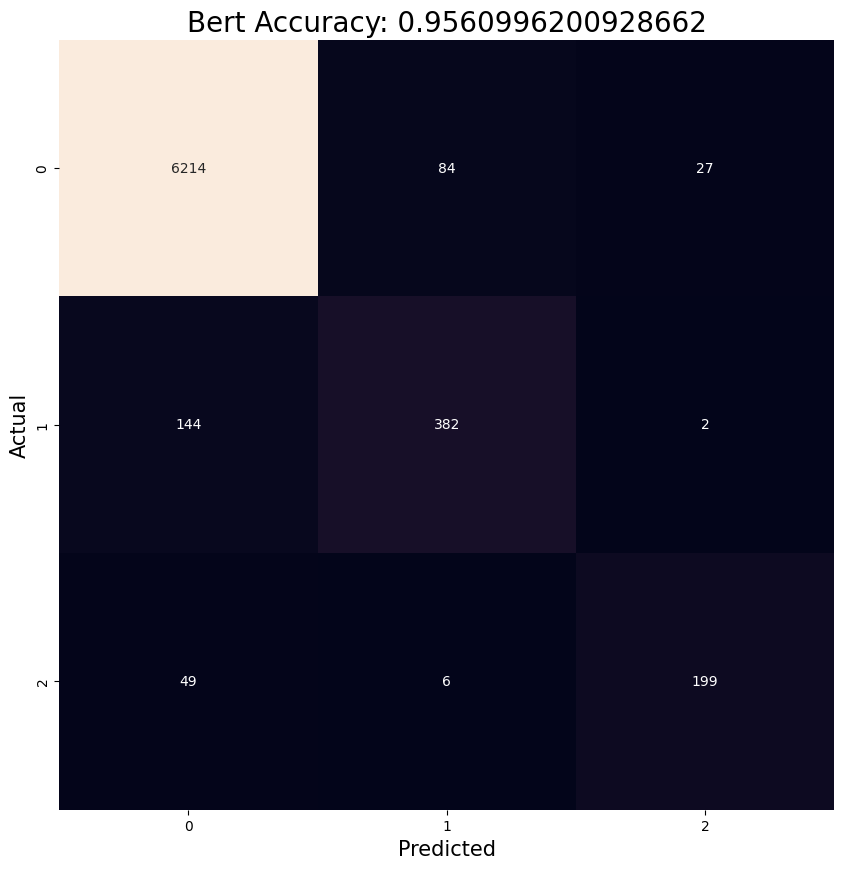

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

test_label = np.array(list(test_label))

labels = [0,1,2]
labels = np.array(labels)
bert_accuracy = accuracy_score(test_label,predictions)

bert_cn = confusion_matrix(test_label,predictions)
plt.subplots(figsize=(10,10))
sns.heatmap(bert_cn,annot=True,fmt="1d",cbar=False,xticklabels=labels,yticklabels=labels)
plt.title("Bert Accuracy: {}".format(bert_accuracy),fontsize=20)
plt.xlabel("Predicted",fontsize=15)
plt.ylabel("Actual",fontsize=15)
plt.show()

In [11]:
predictions, raw_outputs = model.predict(["พร้อมส่งแท่งไฟ #BLACKPINK OFFICIAL LIGHT STICK VRE.2 💖📍Price:1490สินค้าเป็นมือ1ไม่เคยแกะนะงับ🤏🏻🩷🎀รับผ่อน2week🌻ว่าง2แท่ง📮ค่าส่ง 60฿ emsสนใจDM💬🛍#ตลาดนัดบพ #ตลาดนัดแบล็คพิ้งค์ #ตลาดนัดblackpink https://t.co/htCVZVva3i"])

0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
print(predictions)
print(raw_outputs)

[2]
[[-2.60995293 -1.78555071  4.86444664]]
